In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#7
x_data=[1,2,3]
y_data=[1,2,3]

W=tf.Variable(tf.random_normal([1]),name='weight')
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

hypothesis=W*X

cost=tf.reduce_mean(tf.square(hypothesis-Y))

learning_rate=0.1
optimizer=tf.train.GradientDescentOptimizer(learning_rate)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(train, feed_dict={X:x_data,Y:y_data})
    print(step,sess.run(cost,feed_dict={X:x_data,Y:y_data}),sess.run(W))

In [ ]:
#9
x_data=[[72.,80.,75.],[93.,88.,93.],[89.,91.,90.],[96.,98.,100.],[73.,66.,70.]]
y_data=[[152.],[185.],[180.],[196.],[142.]]

W=tf.Variable(tf.random_normal([3,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')
X=tf.placeholder(tf.float32,shape=[None,3])
Y=tf.placeholder(tf.float32,shape=[None,1])
#지금은 5개이지만 데이터 추가가 용이하도록 None으로 설정
hypothesis=tf.matmul(X,W)+b

cost=tf.reduce_mean(tf.square(hypothesis-Y))

learning_rate=1e-5
optimizer=tf.train.GradientDescentOptimizer(learning_rate)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val,hy_val,_=sess.run([cost,hypothesis,train], feed_dict={X:x_data,Y:y_data})
    if step%10==0:
        print(step,cost_val, hy_val)

In [ ]:
#13 당뇨병, 로지스틱 분류 이용(시그모이드, 바이너리)
xy=np.loadtxt("data-03-diabetes.csv.txt",delimiter=',',dtype=np.float32)
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

X=tf.placeholder(tf.float32,shape=[None,8])
Y=tf.placeholder(tf.float32,shape=[None,1])
W=tf.Variable(tf.random_normal([8,1]))
B=tf.Variable(tf.random_normal([1]))

hypothesis=tf.sigmoid(tf.matmul(X,W)+B)
cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predict=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predict,Y),dtype=tf.float32))

with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    feed={X:x_data,Y:y_data}
    for step in range(10001):
        sess.run(train,feed_dict=feed)
        if step%200==0:
            print(step, sess.run(cost,feed_dict=feed))
    h,c,a=sess.run([hypothesis,cost,accuracy],feed_dict=feed)
    print("\nhypothesis=",h,"\ncost=",c,"\naccuracy=",a)

In [ ]:
#17 softmax 이용
xy=np.loadtxt("data-04-zoo.csv.txt",delimiter=',',dtype=np.float32)
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

nb_classes=7

X=tf.placeholder(tf.float32,shape=[None,16])
Y=tf.placeholder(tf.int32,shape=[None,1])
W=tf.Variable(tf.random_normal([16,nb_classes]))
B=tf.Variable(tf.random_normal([nb_classes]))

Y_one_hot=tf.one_hot(Y,nb_classes)
Y_one_hot=tf.reshape(Y_one_hot,[-1,nb_classes])

logits=tf.matmul(X,W)+B
hypothesis=tf.nn.softmax(logits)

cost_i=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
cost=tf.reduce_mean(cost_i)
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

prediction=tf.argmax(hypothesis,1)
correct_prediction=tf.equal(prediction,tf.argmax(Y_one_hot,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed={X:x_data,Y:y_data}
    for step in range(2001):
        sess.run(train,feed_dict=feed)
        if step%200==0:
            loss,acc=sess.run([cost,accuracy],feed_dict=feed)
            print('step={:5}\tloss={:.3f}\taccuracy={:.2%}'.format(step,loss,acc))
    pred=sess.run(prediction,feed_dict=feed)
    for p,y in zip(pred,y_data.flatten()):
        print("[{}] prediction={} Y={}".format(p==int(y),p,int(y)))
    

In [ ]:
#20 normalization 
#[1,2,10000,3,4]->[0.001,0.002,0.5,0.003,0.004]
#input 중 outlier를 다른 데이터와 균일하게 해야함
#xy=minmaxscaler(xy) 사용

In [ ]:
import input_data

mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

nb_classes=10

X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])
W=tf.Variable(tf.random_normal([784,10]))
B=tf.Variable(tf.random_normal([10]))


logits=tf.matmul(X,W)+B
hypothesis=tf.nn.softmax(logits)

cost_i=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y)
cost=tf.reduce_mean(cost_i)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

is_correct=tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs=15
batch_size=100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size) 
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            c,_=sess.run([cost,train],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost+=c/total_batch
        print('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))
    print("Accuracy: ",accuracy.eval(session=sess,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

In [ ]:
#24 tf 함수실습
sess=tf.Session()
x=[1,2,3]
y=[4,5,6]
z=[7,8,9]
tf.stack([x,y,z],axis=-1).eval(session=sess)

In [ ]:
#28 xor해결하기
#2개의 깊이, 2개의 너비
x_data=np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float32)
y_data=np.array([[0],[1],[1],[0]],dtype=np.float32)

X=tf.placeholder(tf.float32,[4,2])
Y=tf.placeholder(tf.float32,[4,1])

#2,2에서 두번째 2가 해당 층의 너비
#layer의 개수가 모형의 깊이
W1=tf.Variable(tf.random_normal([2,2]))
B1=tf.Variable(tf.random_normal([2]))
layer1=tf.sigmoid(tf.matmul(X,W1)+B1)

W2=tf.Variable(tf.random_normal([2,1]))
B2=tf.Variable(tf.random_normal([1]))
hypothesis=tf.sigmoid(tf.matmul(layer1,W2)+B2)

cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train,feed_dict={X:x_data,Y:y_data})
        if step%1000==0:
            print(step,sess.run(cost,feed_dict={X:x_data,Y:y_data}),sess.run([W1,W2])) 
    h,c,a=sess.run([hypothesis,cost,accuracy],feed_dict={X:x_data,Y:y_data})
    print('\nhypothesis=',h,'\ncorrect=',c,'\naccuracy=',a)

In [ ]:
#34 정확도 높이기 mnist
#경사하강->89.53 / 아담->91.88 / 초기값 문제 해결&l.r 0.01로 변경
#깊이 너비 확장(3,256)->96.33 / 깊이 너비 확장(5,512)->97.25
#더 나아졌지만 강의대로 dropout 사용->96.03?
import input_data

mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

nb_classes=10

X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])
keep_prob=tf.placeholder(tf.float32)

W1=tf.get_variable("W1",shape=[784,512],initializer=tf.contrib.layers.xavier_initializer())
W2=tf.get_variable("W2",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
W3=tf.get_variable("W3",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
W4=tf.get_variable("W4",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
W5=tf.get_variable("W5",shape=[512,10],initializer=tf.contrib.layers.xavier_initializer())

B1=tf.Variable(tf.random_normal([512]))
B2=tf.Variable(tf.random_normal([512]))
B3=tf.Variable(tf.random_normal([512]))
B4=tf.Variable(tf.random_normal([512]))
B5=tf.Variable(tf.random_normal([10]))

L1=tf.nn.relu(tf.matmul(X,W1)+B1)
L1=tf.nn.dropout(L1,keep_prob=keep_prob)
L2=tf.nn.relu(tf.matmul(L1,W2)+B2)
L2=tf.nn.dropout(L2,keep_prob=keep_prob)
L3=tf.nn.relu(tf.matmul(L2,W3)+B3)
L4=tf.nn.relu(tf.matmul(L3,W4)+B4)

logits=tf.matmul(L4,W5)+B5
hypothesis=tf.nn.softmax(logits)

cost_i=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y)
cost=tf.reduce_mean(cost_i)

train=tf.train.AdamOptimizer(0.01).minimize(cost)

is_correct=tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs=15
batch_size=100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size) 
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            c,_=sess.run([cost,train],feed_dict={X:batch_xs,Y:batch_ys,keep_prob:0.7})
            avg_cost+=c/total_batch
        print('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))
    print("Accuracy: ",accuracy.eval(session=sess,feed_dict={X:mnist.test.images,Y:mnist.test.labels,keep_prob:1}))

In [ ]:
#34 정확도 높이기 iris 혼자실습
#iris-setosa 1 / iris-versicolor 2 / iris-virginica 3
#정확도::경사하강->97.3 / 아담->98.6 / 깊이와 너비 증가->1.0
#but this program does'nt seperate test and train data
xy=np.loadtxt("iris.csv.txt",delimiter=',',dtype=np.string_)
for i in range(len(xy)):
    for j in range(len(xy[i])):
        if xy[i][j]==b'Iris-setosa':
            xy[i][j]='0'
        elif xy[i][j]==b'Iris-versicolor':
            xy[i][j]='1'
        elif xy[i][j]==b'Iris-virginica':
            xy[i][j]='2'
xy1=xy.astype(np.float32)
x_data=xy1[:,0:-1]
y_data=xy1[:,[-1]]
X=tf.placeholder(tf.float32,shape=[None,4])
Y=tf.placeholder(tf.int32,shape=[None,1])
W1=tf.Variable(tf.random_normal([4,100]))
W2=tf.Variable(tf.random_normal([100,100]))
W3=tf.Variable(tf.random_normal([100,3]))
B1=tf.Variable(tf.random_normal([100]))
B2=tf.Variable(tf.random_normal([100]))
B3=tf.Variable(tf.random_normal([3]))

Y_one_hot=tf.one_hot(Y,3)
Y_one_hot=tf.reshape(Y_one_hot,[-1,3])

layer1=tf.nn.relu(tf.matmul(X,W1)+B1)
layer2=tf.nn.relu(tf.matmul(layer1,W2)+B2)
logits=tf.matmul(layer2,W3)+B3
hypothesis=tf.nn.softmax(tf.matmul(layer2,W3)+B3)
cost_i=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
cost=tf.reduce_mean(cost_i)
train=tf.train.AdamOptimizer(0.1).minimize(cost)

prediction=tf.argmax(hypothesis,1)
correct_prediction=tf.equal(prediction,tf.argmax(Y_one_hot,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    feed={X:x_data,Y:y_data}
    sess.run(tf.global_variables_initializer())
    for step in range(5000):
        sess.run(train,feed_dict=feed)
        if step%500==0:
            loss,acc=sess.run([cost,accuracy],feed_dict=feed)
            print('step=',step,'\tloss=',loss,'\taccuracy=',acc)
    pred=sess.run(prediction,feed_dict=feed)
    for p,y in zip(pred,y_data.flatten()):
        print('[{}] Prediction: {} True Y: {}'.format(p==int(y),p,int(y)))

In [ ]:
#39 mnist cnn적용 97.98
import input_data

mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

X=tf.placeholder(tf.float32,[None,784])
X_img=tf.reshape(X,[-1,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])

W1=tf.Variable(tf.random_normal([3,3,1,32]),tf.float32)
L1=tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')
L1=tf.nn.relu(L1)
#maxpool strides=2 => 14,14,1
L1=tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

W2=tf.Variable(tf.random_normal([3,3,32,64]),tf.float32)
L2=tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
L2=tf.nn.relu(L2)
L2=tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L2=tf.reshape(L2,[-1,7*7*64])

W3=tf.get_variable("W3",shape=[7*7*64,10],initializer=tf.contrib.layers.xavier_initializer())
B=tf.Variable(tf.random_uniform([10]))

logits=tf.matmul(L2,W3)+B
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))
optimizer=tf.train.AdamOptimizer(0.01).minimize(cost)

training_epoch=15
batch_size=100

correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epoch):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            c,_=sess.run([cost,optimizer],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost+=c/total_batch
        print("epoch: %04d" %(epoch+1),"cost: {:.9f}".format(avg_cost))
    print("Accuracy:",sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

In [ ]:
#40 mnist cnn 적용2 class로 정리
#깊이 너비 증가(cnn깊이 2->3,행렬계산깊이1->2 너비625)->99.28%
#앙상블 포함->
class Model():
    def __init__(self,sess,name):
        self.sess=sess
        self.name=name
        self._build_net()
    
    def _build_net(self):
        with tf.variable_scope(self.name):
            self.X=tf.placeholder(tf.float32,[None,784])
            X_img=tf.reshape(self.X,[-1,28,28,1])
            self.Y=tf.placeholder(tf.float32,[None,10])
            
            self.keep_prob=tf.placeholder(tf.float32)

            W1=tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))
            L1=tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')
            L1=tf.nn.relu(L1)
            #maxpool strides=2 => 14,14,1
            L1=tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
            L1=tf.nn.dropout(L1,keep_prob=self.keep_prob)

            W2=tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
            L2=tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
            L2=tf.nn.relu(L2)
            L2=tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
            L2=tf.nn.dropout(L2,keep_prob=self.keep_prob)
            
            W3=tf.Variable(tf.random_normal([3,3,64,128],stddev=0.01))
            L3=tf.nn.conv2d(L2,W3,strides=[1,1,1,1],padding='SAME')
            L3=tf.nn.relu(L3)
            L3=tf.nn.max_pool(L3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
            L3=tf.nn.dropout(L3,keep_prob=self.keep_prob)
            L3=tf.reshape(L3,[-1,4*4*128])

            W4=tf.get_variable("W4",shape=[4*4*128,625],initializer=tf.contrib.layers.xavier_initializer())
            B1=tf.Variable(tf.random_uniform([625]))
            L4=tf.nn.relu(tf.matmul(L3,W4)+B1)
            L4=tf.nn.dropout(L4,keep_prob=self.keep_prob)
            
            W5=tf.get_variable("W5",shape=[625,10],initializer=tf.contrib.layers.xavier_initializer())
            B2=tf.Variable(tf.random_normal([10]))
            
            self.logits=tf.matmul(L4,W5)+B2
            self.cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits,labels=self.Y))
            self.optimizer=tf.train.AdamOptimizer(0.001).minimize(self.cost)

            correct_prediction=tf.equal(tf.argmax(self.logits,1),tf.argmax(self.Y,1))
            self.accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
            
    def predict(self,x_test,keep_prob=1.0):
        return self.sess.run(self.logits,feed_dict={self.X:x_test,self.keep_prob:keep_prob})
    
    def get_accuracy(self,x_test,y_test,keep_prob=1.0):
        return self.sess.run(self.accuracy,feed_dict={self.X:x_test,self.Y:y_test,self.keep_prob:keep_prob})
    def train(self,x_data,y_data,keep_prob=0.7):
        return self.sess.run([self.cost,self.optimizer],feed_dict={self.X:x_data,self.Y:y_data,self.keep_prob:keep_prob})

    
import input_data

mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

sess=tf.Session()
m=[]
for i in range(7):
    m.append(Model(sess,"model"+str(i)))

training_epoch=15
batch_size=100
prediction=np.zeros(len(mnist.test.labels)*10).reshape(len(mnist.test.labels),10)
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoch):
    avg_cost_list=np.zeros(len(m))
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        for m_idx,mm in enumerate(m):
            c,_=mm.train(batch_xs,batch_ys)
            avg_cost_list[m_idx]+=c/total_batch
    print("epoch: %04d" %(epoch+1),"cost: ",avg_cost_list)
for m_idx,mm in enumerate(m):
    print("Accuracy:",mm.get_accuracy(mnist.test.images,mnist.test.labels))
    p=mm.predict(mnist.test.images)
    prediction+=p
ensemble_correct_prediction=tf.equal(tf.argmax(prediction,1),tf.argmax(mnist.test.labels,1))
ensemble_accuracy=tf.reduce_mean(tf.cast(ensemble_correct_prediction,tf.float32))
print('ensemble accuracy:',sess.run(ensemble_accuracy))

In [ ]:
#cifar10 실습
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
train_x_list=[]
train_y_list=[]
for i in range(1,6):
    a=unpickle("cifar-10-batches-py/data_batch_"+str(i))
    train_x_list.append(np.array(a[b'data']))
    train_y_list.append(np.array(a[b'labels']).reshape(-1,1))
test=unpickle("cifar-10-batches-py/test_batch")
test_x=np.array(test[b'data'])
#test_x=np.array(train_x_list).flatten('C').reshape(-1,3072).shape
test_y=np.array(test[b'labels']).reshape(-1,1)

keep_prob=tf.placeholder(tf.float32)

X=tf.placeholder(tf.float32,[None,3072])
X_img=tf.reshape(X,[-1,32,32,3])
Y=tf.placeholder(tf.int32,[None,1])
Y_one_hot=tf.one_hot(Y,10)
Y_one_hot=tf.reshape(Y_one_hot,[-1,10])
W1=tf.Variable(tf.random_normal([3,3,3,32],stddev=0.01))
L1=tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L1=tf.nn.dropout(L1,keep_prob=keep_prob)
L1=tf.reshape(L1,[-1,16*16*32])
W2=tf.get_variable("W2",shape=[16*16*32,10],initializer=tf.contrib.layers.xavier_initializer())
B=tf.Variable(tf.random_normal([1]))
L2=tf.matmul(L1,W2)+B
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=L2,labels=Y_one_hot))
optimizer=tf.train.AdamOptimizer(0.00001).minimize(cost)

is_correct=tf.equal(tf.argmax(L1,1),tf.argmax(Y_one_hot,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(15):
        avg_cost=0
        for m,n in zip(train_x_list,train_y_list):
            c,_=sess.run([cost,optimizer],feed_dict={X:m,Y:n,keep_prob:0.7})
            avg_cost+=c/5
        print("cost: ",avg_cost)
    a=sess.run(accuracy,feed_dict={X:test_x,Y:test_y,keep_prob:1})
    print('accuracy=',a)

In [ ]:
#cifar10 출처: http://solarisailab.com/archives/2325
# -*- coding: utf-8 -*-

"""
CIFAR-10 Convolutional Neural Networks(CNN) Example
next_batch function is copied from edo's answer
https://stackoverflow.com/questions/40994583/how-to-implement-tensorflows-next-batch-for-own-data
Author : solaris33
Project URL : http://solarisailab.com/archives/2325
"""

import tensorflow as tf
import numpy as np

# CIFAR-10 데이터를 다운로드 받기 위한 keras의 helper 함수인 load_data 함수를 임포트합니다.
from tensorflow.keras.datasets.cifar10 import load_data

# 다음 배치를 읽어오기 위한 next_batch 유틸리티 함수를 정의합니다.
def next_batch(num, data, labels):
    '''
    `num` 개수 만큼의 랜덤한 샘플들과 레이블들을 리턴합니다.
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

# CNN 모델을 정의합니다. 
def build_CNN_classifier(x):
  # 입력 이미지
    x_image = x

    # 첫번째 convolutional layer - 하나의 grayscale 이미지를 64개의 특징들(feature)으로 맵핑(maping)합니다.
    W_conv1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 3, 64], stddev=5e-2))
    b_conv1 = tf.Variable(tf.constant(0.1, shape=[64]))
    h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

    # 첫번째 Pooling layer
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

    # 두번째 convolutional layer - 32개의 특징들(feature)을 64개의 특징들(feature)로 맵핑(maping)합니다.
    W_conv2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 64, 64], stddev=5e-2))
    b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
    h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

    # 두번째 pooling layer.
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

    # 세번째 convolutional layer
    W_conv3 = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], stddev=5e-2))
    b_conv3 = tf.Variable(tf.constant(0.1, shape=[128]))
    h_conv3 = tf.nn.relu(tf.nn.conv2d(h_pool2, W_conv3, strides=[1, 1, 1, 1], padding='SAME') + b_conv3)

    # 네번째 convolutional layer
    W_conv4 = tf.Variable(tf.truncated_normal(shape=[3, 3, 128, 128], stddev=5e-2))
    b_conv4 = tf.Variable(tf.constant(0.1, shape=[128])) 
    h_conv4 = tf.nn.relu(tf.nn.conv2d(h_conv3, W_conv4, strides=[1, 1, 1, 1], padding='SAME') + b_conv4)

    # 다섯번째 convolutional layer
    W_conv5 = tf.Variable(tf.truncated_normal(shape=[3, 3, 128, 128], stddev=5e-2))
    b_conv5 = tf.Variable(tf.constant(0.1, shape=[128]))
    h_conv5 = tf.nn.relu(tf.nn.conv2d(h_conv4, W_conv5, strides=[1, 1, 1, 1], padding='SAME') + b_conv5)

    # Fully Connected Layer 1 - 2번의 downsampling 이후에, 우리의 32x32 이미지는 8x8x128 특징맵(feature map)이 됩니다.
    # 이를 384개의 특징들로 맵핑(maping)합니다.
    W_fc1 = tf.Variable(tf.truncated_normal(shape=[8 * 8 * 128, 384], stddev=5e-2))
    b_fc1 = tf.Variable(tf.constant(0.1, shape=[384]))

    h_conv5_flat = tf.reshape(h_conv5, [-1, 8*8*128])
    h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

    # Dropout - 모델의 복잡도를 컨트롤합니다. 특징들의 co-adaptation을 방지합니다.
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob) 

    # Fully Connected Layer 2 - 384개의 특징들(feature)을 10개의 클래스-airplane, automobile, bird...-로 맵핑(maping)합니다.
    W_fc2 = tf.Variable(tf.truncated_normal(shape=[384, 10], stddev=5e-2))
    b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
    logits = tf.matmul(h_fc1_drop,W_fc2) + b_fc2
    y_pred = tf.nn.softmax(logits)

    return y_pred, logits

# 인풋 아웃풋 데이터, 드롭아웃 확률을 입력받기위한 플레이스홀더를 정의합니다.
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

# CIFAR-10 데이터를 다운로드하고 데이터를 불러옵니다.
(x_train, y_train), (x_test, y_test) = load_data()
# scalar 형태의 레이블(0~9)을 One-hot Encoding 형태로 변환합니다.
y_train_one_hot = tf.squeeze(tf.one_hot(y_train, 10),axis=1)
y_test_one_hot = tf.squeeze(tf.one_hot(y_test, 10),axis=1)

# Convolutional Neural Networks(CNN) 그래프를 생성합니다.
y_pred, logits = build_CNN_classifier(x)

# Cross Entropy를 비용함수(loss function)으로 정의하고, RMSPropOptimizer를 이용해서 비용 함수를 최소화합니다.
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
train_step = tf.train.RMSPropOptimizer(1e-3).minimize(loss)

# 정확도를 계산하는 연산을 추가합니다.
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 세션을 열어 실제 학습을 진행합니다.
with tf.Session() as sess:
  # 모든 변수들을 초기화한다. 
    sess.run(tf.global_variables_initializer())
  
    # 10000 Step만큼 최적화를 수행합니다.
    for i in range(10000):
        batch = next_batch(128, x_train, y_train_one_hot.eval())

    # 100 Step마다 training 데이터셋에 대한 정확도와 loss를 출력합니다.
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})
            loss_print = loss.eval(feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})

            print("반복(Epoch): %d, 트레이닝 데이터 정확도: %f, 손실 함수(loss): %f" % (i, train_accuracy, loss_print))
    # 20% 확률의 Dropout을 이용해서 학습을 진행합니다.
        sess.run(train_step, feed_dict={x: batch[0], y: batch[1], keep_prob: 0.8})

  # 학습이 끝나면 테스트 데이터(10000개)에 대한 정확도를 출력합니다.  
    test_accuracy = 0.0  
    for i in range(10):
        test_batch = next_batch(1000, x_test, y_test_one_hot.eval())
        test_accuracy = test_accuracy + accuracy.eval(feed_dict={x: test_batch[0], y: test_batch[1], keep_prob: 1.0})
    test_accuracy = test_accuracy / 10;
    print("테스트 데이터 정확도: %f" % test_accuracy)

In [ ]:
#43 RNN basic
input_dim=5
hidden_size=5
sequence_length=6
batch_size=1

idx2char=['h','i','e','l','o']
x_data=[[0,1,0,2,3,3]]
x_one_hot=[[[1,0,0,0,0],[0,1,0,0,0],[1,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,1,0]]]
y_data=[[1,0,2,3,3,4]]

X=tf.placeholder(tf.float32,[None,sequence_length,input_dim])
Y=tf.placeholder(tf.int32,[None,sequence_length])

cell=tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size,state_is_tuple=True)
initial_state=cell.zero_state(batch_size,tf.float32)
#단순화를 위해 rnn에서 나온 output을 바로 sequence_loss에 사용(잘못된 것임)
outputs,_state=tf.nn.dynamic_rnn(cell,X,initial_state=initial_state,dtype=tf.float32)
weights=tf.ones([batch_size,sequence_length])

sequence_loss=tf.contrib.seq2seq.sequence_loss(logits=outputs,targets=Y,weights=weights)
loss=tf.reduce_mean(sequence_loss)
train=tf.train.AdamOptimizer(0.1).minimize(loss)

prediction=tf.argmax(outputs,axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        l,_=sess.run([loss,train],feed_dict={X:x_one_hot,Y:y_data})
        result=sess.run(prediction,feed_dict={X:x_one_hot})
        print(i,"loss:",l,"prediction: ",result,"true Y:",y_data)
        result_str=[idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ",''.join(result_str))
        

In [ ]:
#44 rnn long sequence
sample='if you want you'

idx2char=list(set(sample))
char2idx={c: i for i,c in enumerate(idx2char)}
sample_idx=[char2idx[c] for c in sample]
x_data=[sample_idx[:-1]]
y_data=[sample_idx[1:]]

sequence_length=len(sample)-1
num_classes=len(idx2char)
dic_size=len(char2idx)
rnn_hidden_size=len(char2idx)
batch_size=1

X=tf.placeholder(tf.int32,[None,sequence_length])
Y=tf.placeholder(tf.int32,[None, sequence_length])

x_one_hot=tf.one_hot(X,num_classes)

cell=tf.contrib.rnn.BasicLSTMCell(num_units=rnn_hidden_size,state_is_tuple=True)
initial_state=cell.zero_state(batch_size,tf.float32)
outputs,_state=tf.nn.dynamic_rnn(cell,x_one_hot,initial_state=initial_state,dtype=tf.float32)

weights=tf.ones([batch_size,sequence_length])
sequence_loss=tf.contrib.seq2seq.sequence_loss(logits=outputs,targets=Y,weights=weights)
loss=tf.reduce_mean(sequence_loss)
train=tf.train.AdamOptimizer(0.1).minimize(loss)

prediction=tf.argmax(outputs,axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        l,_=sess.run([loss,train],feed_dict={X:x_data,Y:y_data})
        result=sess.run(prediction,feed_dict={X:x_data})
        result_str=[idx2char[c] for c in np.squeeze(result)]
        print(i,"loss:",l,"prediction:",''.join(result_str))

In [ ]:
#45 rnn longlong sequence
sentence=("if you want to build a ship, don't drum up people together to "
        "collect wood and don't assign them tasks and work, but rether "
        "teach them to long for the endless immensity of the sea.")
char_set=list(set(sentence))
char_dic={w:i for i,w in enumerate(char_set)}

data_dim=len(char_set)
hidden_size=len(char_set)
num_classes=len(char_set)
seq_length=10

dataX=[]
dataY=[]
for i in range(len(sentence)-seq_length):
    x_str=sentence[i:i+seq_length]
    y_str=sentence[i+1:i+seq_length+1]
    
    x=[char_dic[c] for c in x_str]
    y=[char_dic[c] for c in y_str]
    
    dataX.append(x)
    dataY.append(y)
    
batch_size=len(dataX)

X=tf.placeholder(tf.int32,[None,seq_length])
Y=tf.placeholder(tf.int32,[None,seq_length])

X_one_hot=tf.one_hot(X,num_classes)

cell=tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size,state_is_tuple=True)
cell=tf.contrib.rnn.MultiRNNCell([cell]*2,state_is_tuple=True)
initial_state=cell.zero_state(batch_size,tf.float32)
outputs,_=tf.nn.dynamic_rnn(cell,X_one_hot,initial_state=initial_state,dtype=tf.float32)

X_for_softmax=tf.reshape(outputs,[-1,hidden_size])
softmax_w=tf.get_variable("softmax_w",[hidden_size,num_classes])
softmax_b=tf.get_variable("softmax_b",[num_classes])
outputs=tf.matmul(X_for_softmax,softmax_w)+softmax_b
outputs=tf.reshape(outputs,[batch_size,seq_length,num_classes])

weights=tf.ones([batch_size,seq_length])
seq_loss=tf.contrib.seq2seq.sequence_loss(logits=outputs,targets=Y,weights=weights)
loss=tf.reduce_mean(seq_loss)
train=tf.train.AdamOptimizer(0.1).minimize(loss)

prediction=tf.argmax(outputs,2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(500):
        l,_,results=sess.run([loss,train,outputs],feed_dict={X:dataX,Y:dataY})
        for j,result in enumerate(results):
            index=np.argmax(result,1)
            print(i,j,''.join([char_set[t] for t in index]),l)
    results=sess.run(outputs,feed_dict={X:dataX})
    for j,result in enumerate(results):
        index=np.argmax(result,1)
        if j is 0:
            print(''.join([char_set[t] for t in index]),end='')
        else:
            print(char_set[index[-1]],end='')

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
0 0.2709216
1 0.14304486
2 0.066729136
3 0.031967755
4 0.027456013
5 0.038705554
6 0.049588688
7 0.051896032
8 0.046285257
9 0.036574196
10 0.026318375
11 0.017772926
12 0.011903251
13 0.00874076
14 0.007776149
15 0.00827312
16 0.009480658
17 0.010759722
18 0.011647116
19 0.011875723
20 0.0113648055
21 0.010190689
22 0.00854526
23 0.006688156
24 0.0048970478
25 0.0034197948
26 0.0024325443
27 0.0020089243
28 0.002106649
29 0.0025778874
30 0.0032061203
31 0.0037641558
32 0.0040770937
33 0.0040673576
34 0.003764418
35 0.0032782299
36 0.0027516133
37 0.0023123196
38 0.0020404037
39 0.0019567956
40 0.0020306534
41 0.002198385
42 0.002386444
43 0.0025313767
44 0.0025931362
45 0.0025601678
46 0.002446908
47 0.0022857205
48 0.0021160431
49 0.0019735838
50 0.0018820

476 0.0010806203
477 0.0010794261
478 0.0010782303
479 0.0010770332
480 0.0010758345
481 0.0010746341
482 0.0010734326
483 0.0010722292
484 0.0010710246
485 0.0010698182
486 0.0010686103
487 0.001067401
488 0.0010661902
489 0.0010649781
490 0.001063764
491 0.0010625491
492 0.0010613322
493 0.001060114
494 0.001058895
495 0.001057674
496 0.0010564515
497 0.0010552278
498 0.0010540024
499 0.0010527767
500 0.0010515489
501 0.0010503201
502 0.00104909
503 0.0010478586
504 0.001046626
505 0.0010453926
506 0.0010441577
507 0.0010429219
508 0.0010416848
509 0.001040447
510 0.0010392081
511 0.001037968
512 0.0010367275
513 0.0010354861
514 0.0010342436
515 0.0010330002
516 0.0010317566
517 0.0010305118
518 0.0010292665
519 0.001028021
520 0.0010267743
521 0.0010255281
522 0.0010242806
523 0.0010230328
524 0.0010217852
525 0.0010205371
526 0.0010192887
527 0.00101804
528 0.0010167916
529 0.001015543
530 0.0010142945
531 0.0010130461
532 0.0010117978
533 0.0010105502
534 0.0010093028
535 0.00100

954 0.00079806853
955 0.000796208
956 0.0007932762
957 0.00079308305
958 0.0007949047
959 0.00079537183
960 0.0007936309
961 0.000792138
962 0.0007925304
963 0.0007935481
964 0.0007933493
965 0.0007920932
966 0.00079136994
967 0.0007917462
968 0.0007922303
969 0.0007919018
970 0.0007910725
971 0.0007906553
972 0.0007908592
973 0.0007910774
974 0.0007908158
975 0.0007902657
976 0.0007899386
977 0.0007899798
978 0.00079007354
979 0.00078991265
980 0.0007895428
981 0.0007892425
982 0.0007891564
983 0.0007891688
984 0.00078908325
985 0.0007888482
986 0.0007885813
987 0.0007884103
988 0.00078834046
989 0.00078827824
990 0.00078814186
991 0.0007879394
992 0.00078773976
993 0.00078759616
994 0.0007875004
995 0.00078740536
996 0.00078727317
997 0.00078710646
998 0.0007869364
999 0.0007867911


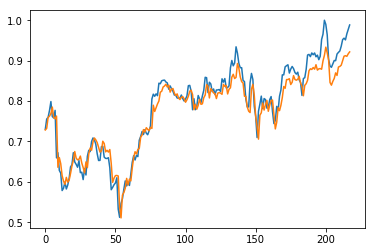

In [2]:
#47 time series rnn
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

timesteps=seq_length=7
#open,high,low,close,volumn
data_dim=5
#close
output_dim=1
xy=np.loadtxt('data-02-stock_daily.csv.txt',delimiter=',')
#시간순으로 만들기위함
xy=xy[::-1]
xy=MinMaxScaler(xy)
x=xy
y=xy[:,[-1]]

dataX=[]
dataY=[]
for i in range(len(y)-seq_length):
    #이전 7일간의 데이터를 가지고 다음 날 코스닥시장 종가 예측
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    dataX.append(_x)
    dataY.append(_y)
    
train_size=int(len(dataY)*0.7)
test_size=len(dataY)-train_size
trainX,testX=np.array(dataX[0:train_size]),np.array(dataX[train_size:len(dataX)])
trainY,testY=np.array(dataY[0:train_size]),np.array(dataY[train_size:len(dataY)])

X=tf.placeholder(tf.float32,[None,seq_length,data_dim])
Y=tf.placeholder(tf.float32,[None,1])

cell=tf.contrib.rnn.BasicLSTMCell(num_units=10,state_is_tuple=True)
outputs,_states=tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)
Y_pred=tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn=None)

loss=tf.reduce_mean(tf.square(Y_pred-Y))
optimizer=tf.train.AdamOptimizer(0.01).minimize(loss)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(1000):
    _,l=sess.run([optimizer,loss],feed_dict={X:trainX,Y:trainY})
    print(i,l)
testPredict=sess.run(Y_pred,feed_dict={X:testX})

plt.plot(testY)
plt.plot(testPredict)
plt.show()